In [85]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('termdeposit_train.csv')

In [86]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [87]:
df["subscribed"].unique()

array(['no', 'yes'], dtype=object)

# Note1: Classification model will be applied

In [88]:
df.shape

(31647, 18)

In [89]:
df= df.drop_duplicates() # Removing duplicate entries
df.shape

(31647, 18)

In [90]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

# EDA
1. Null/NaN

In [91]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


# Note2:
it has "Job","Education","Default","Housing","Loan","Contact","Month","poutcome","subscribed" as object

In [93]:
# Checking the value counts of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120  

In [94]:
df.nunique().to_frame("No of unique values")

,No of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [95]:
categorical_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] == "object":
        categorical_col.append(i)
print("Categorical Columns: ", categorical_col)
print("\n")
num_col =[]
for i in df.dtypes.index:
    if df.dtypes[i] != "object":
        num_col.append(i)
print("Numerical Columns: ", num_col)
print("\n")

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Columns:  ['ID', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




### Note3:  ID can be dropped as well as it has unique values.
 

In [96]:
columns_to_drop=["ID"]
df = df.drop(columns_to_drop, axis=1)

In [97]:
df.shape

(31647, 17)

# 2. Label Encoder

In [98]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))
        
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0.0,1.0,3.0,0.0,1933,0.0,0.0,1.0,19,9.0,44,2,-1,0,3.0,0.0
1,31,11.0,1.0,1.0,0.0,3,0.0,0.0,0.0,20,5.0,91,2,-1,0,3.0,0.0
2,27,7.0,1.0,1.0,0.0,891,1.0,0.0,0.0,18,5.0,240,1,-1,0,3.0,0.0
3,57,4.0,0.0,2.0,0.0,3287,0.0,0.0,0.0,22,6.0,867,1,84,3,2.0,1.0
4,31,9.0,1.0,1.0,0.0,119,1.0,0.0,0.0,4,3.0,380,1,-1,0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4.0,2.0,2.0,0.0,0,1.0,0.0,0.0,12,8.0,116,2,-1,0,3.0,0.0
31643,53,4.0,0.0,2.0,0.0,380,0.0,1.0,0.0,5,6.0,438,2,-1,0,3.0,1.0
31644,32,4.0,2.0,2.0,0.0,312,0.0,0.0,0.0,7,1.0,37,3,-1,0,3.0,0.0
31645,57,9.0,1.0,1.0,0.0,225,1.0,0.0,1.0,15,8.0,22,7,337,12,0.0,0.0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         31647 non-null  int64  
 1   job         31647 non-null  float64
 2   marital     31647 non-null  float64
 3   education   31647 non-null  float64
 4   default     31647 non-null  float64
 5   balance     31647 non-null  int64  
 6   housing     31647 non-null  float64
 7   loan        31647 non-null  float64
 8   contact     31647 non-null  float64
 9   day         31647 non-null  int64  
 10  month       31647 non-null  float64
 11  duration    31647 non-null  int64  
 12  campaign    31647 non-null  int64  
 13  pdays       31647 non-null  int64  
 14  previous    31647 non-null  int64  
 15  poutcome    31647 non-null  float64
 16  subscribed  31647 non-null  float64
dtypes: float64(10), int64(7)
memory usage: 4.1 MB


### 3. Skewness, Outliars (We donot remove Skewness and Outliars from cataegorial columns)

In [100]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.332923,1.167220,1.225013,0.018485,1363.890258,0.555629,0.162132,0.644642,15.835466,5.533131,258.113534,2.765697,39.576042,0.574272,2.566152,0.117389
std,10.625134,3.271868,0.607186,0.749195,0.134700,3028.304293,0.496904,0.368578,0.899480,8.337097,3.004247,257.118973,3.113830,99.317592,2.422529,0.982069,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,0.000000,8.000000,3.000000,104.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,2.000000,21.000000,8.000000,318.500000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


- Column count is same: No missing data
- There is no negative/valid _ Dataset is OK
- Median (50%) > Mean - "day","poutcome","housing' --> Left Skewed
- Median (50%) < Mean - "age","Balance","Duration","pdays","loan","contact","previous","poucome" -> Right Skewed
- Standard Dev for "Balance ","Duration","Pdays" is high -> Outliars are present
- Percentile 75% and max : It is there in "Age", "job","balance","day","duration","campaign","pdays","previous" - outliars are present

In [101]:
df.skew()

age            0.681607
job            0.264817
marital       -0.100071
education      0.199441
default        7.149903
balance        7.995696
housing       -0.223918
loan           1.833474
contact        0.758602
day            0.087185
month         -0.486498
duration       3.199766
campaign       4.873935
pdays          2.642374
previous      49.302348
poutcome      -1.996421
subscribed     2.377445
dtype: float64

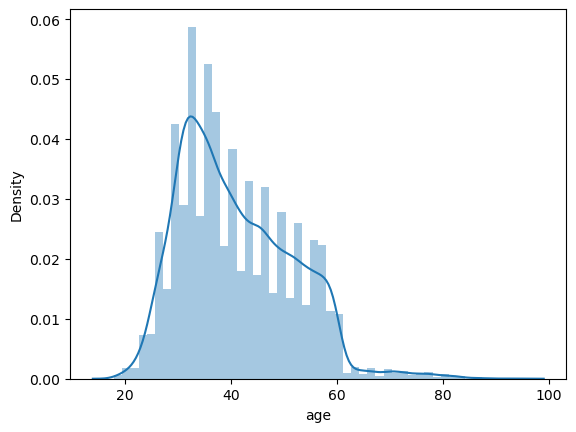

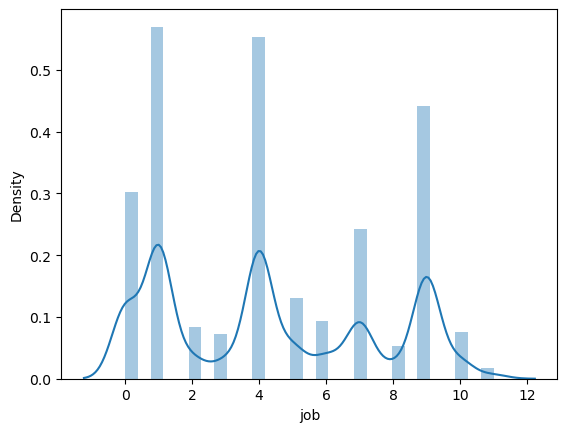

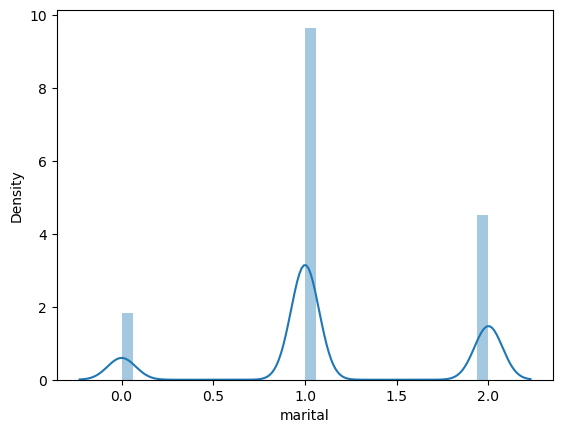

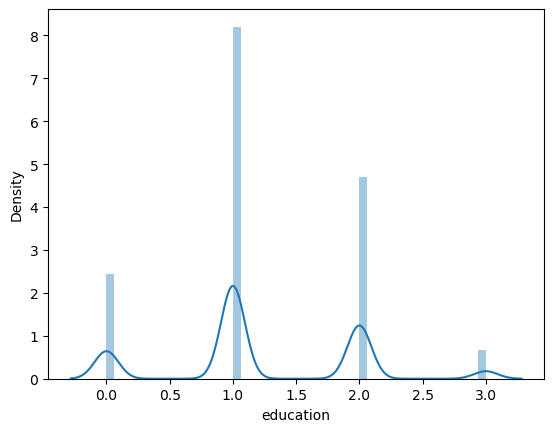

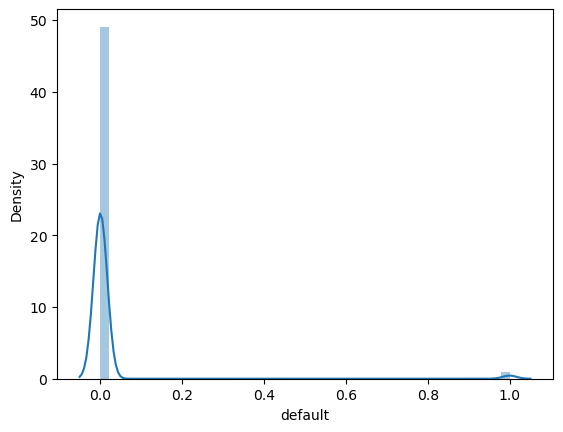

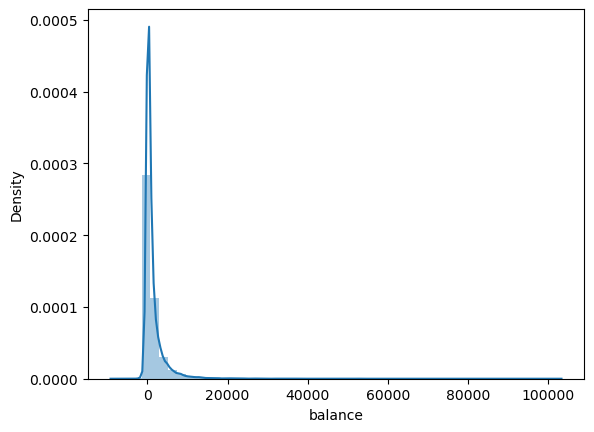

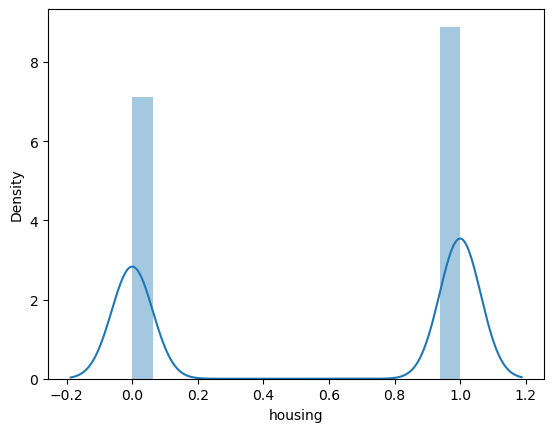

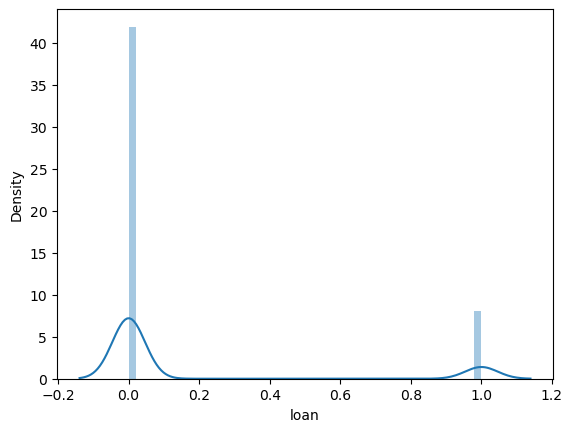

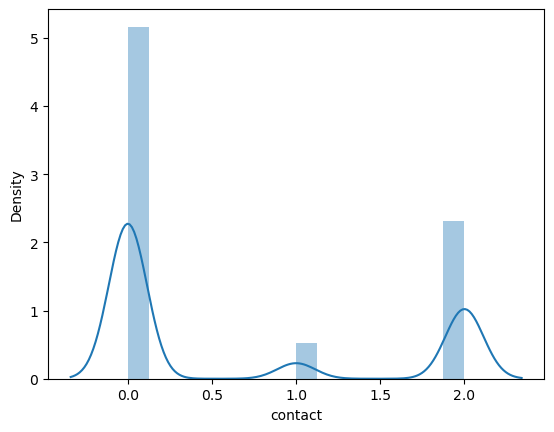

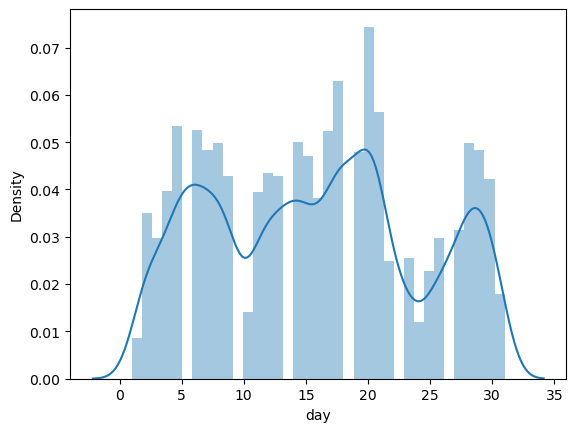

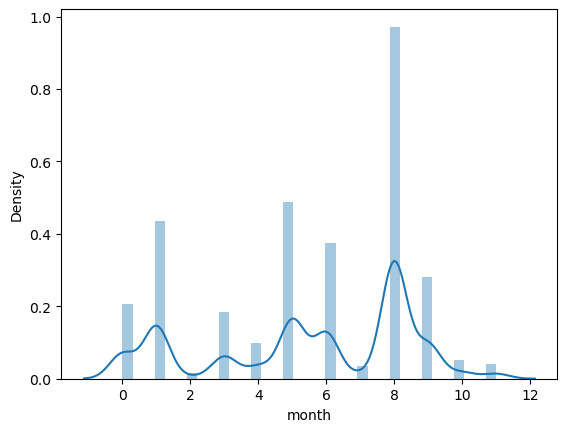

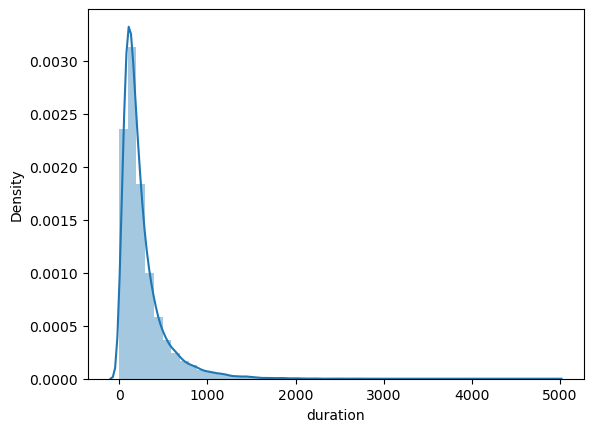

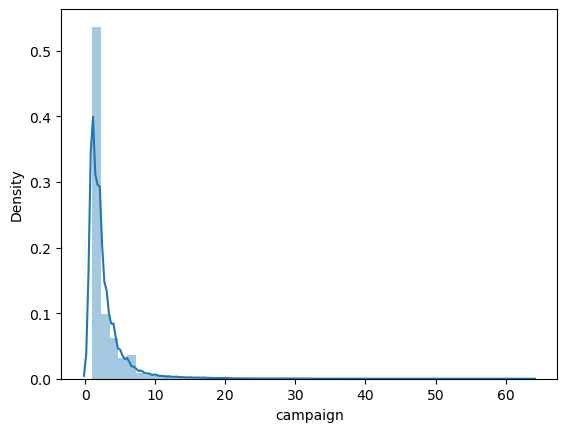

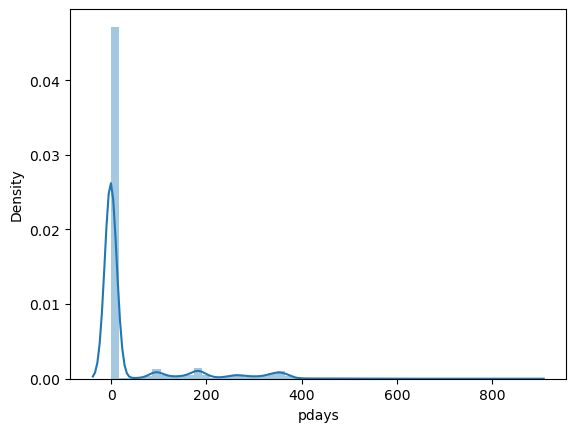

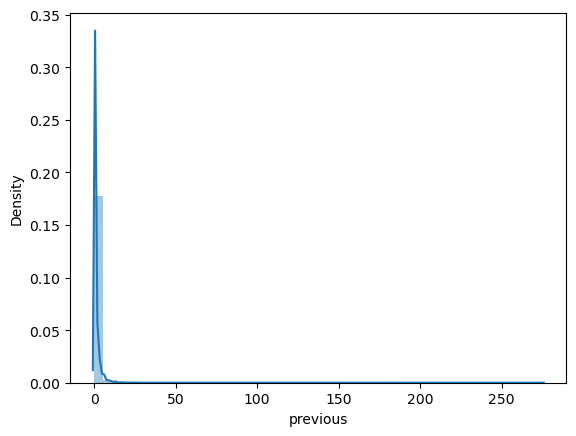

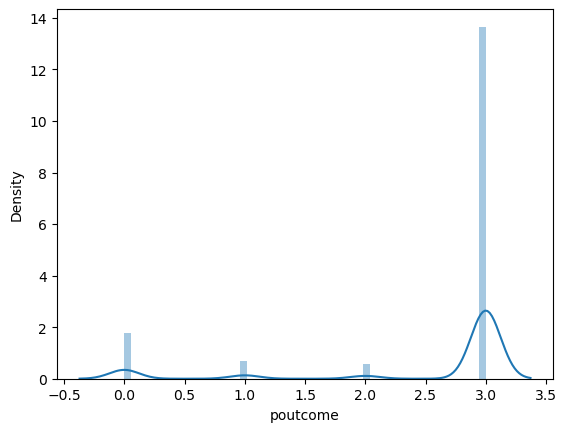

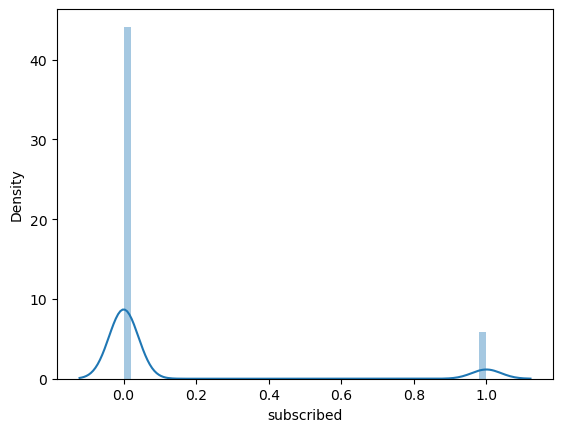

In [102]:
for i in df.columns: # Skewness
    plt.figure()
    sns.distplot(df[i])

In [103]:
x= ['age', 'balance','duration', 'campaign', 'previous']
for i in x:
    df[i]=np.cbrt(df[i])
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month        -0.486498
duration      0.647275
campaign      1.667938
pdays         2.642374
previous      2.079738
poutcome     -1.996421
subscribed    2.377445
dtype: float64

In [104]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,3.825862,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.0,19,9.0,3.530348,1.259921,-1,0.000000,3.0,0.0
1,3.141381,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.0,20,5.0,4.497941,1.259921,-1,0.000000,3.0,0.0
2,3.000000,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,18,5.0,6.214465,1.000000,-1,0.000000,3.0,0.0
3,3.848501,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,22,6.0,9.535417,1.000000,84,1.442250,2.0,1.0
4,3.141381,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,4,3.0,7.243156,1.000000,-1,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,3.072317,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,4.876999,1.259921,-1,0.000000,3.0,0.0
31643,3.756286,4.0,0.0,2.0,0.0,7.243156,0.0,1.0,0.0,5,6.0,7.594363,1.259921,-1,0.000000,3.0,1.0
31644,3.174802,4.0,2.0,2.0,0.0,6.782423,0.0,0.0,0.0,7,1.0,3.332222,1.442250,-1,0.000000,3.0,0.0
31645,3.848501,9.0,1.0,1.0,0.0,6.082202,1.0,0.0,1.0,15,8.0,2.802039,1.912931,337,2.289428,0.0,0.0


In [105]:
df.nunique().to_frame("No of unique values")

,No of unique values
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3
day,31


age              Axes(0.125,0.825775;0.168478x0.0542254)
job           Axes(0.327174,0.825775;0.168478x0.0542254)
marital       Axes(0.529348,0.825775;0.168478x0.0542254)
education     Axes(0.731522,0.825775;0.168478x0.0542254)
default          Axes(0.125,0.760704;0.168478x0.0542254)
balance       Axes(0.327174,0.760704;0.168478x0.0542254)
housing       Axes(0.529348,0.760704;0.168478x0.0542254)
loan          Axes(0.731522,0.760704;0.168478x0.0542254)
contact          Axes(0.125,0.695634;0.168478x0.0542254)
day           Axes(0.327174,0.695634;0.168478x0.0542254)
month         Axes(0.529348,0.695634;0.168478x0.0542254)
duration      Axes(0.731522,0.695634;0.168478x0.0542254)
campaign         Axes(0.125,0.630563;0.168478x0.0542254)
pdays         Axes(0.327174,0.630563;0.168478x0.0542254)
previous      Axes(0.529348,0.630563;0.168478x0.0542254)
poutcome      Axes(0.731522,0.630563;0.168478x0.0542254)
subscribed       Axes(0.125,0.565493;0.168478x0.0542254)
dtype: object

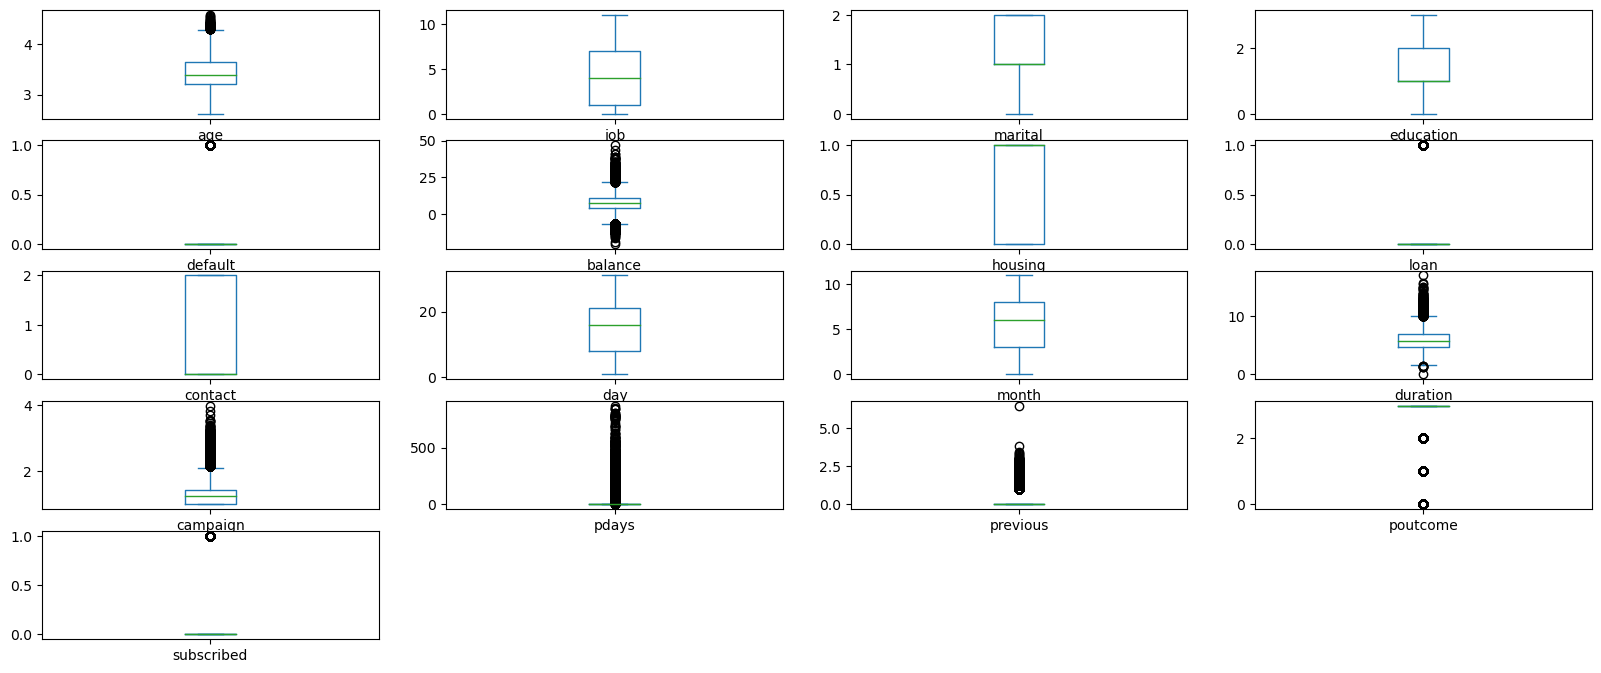

In [106]:
df.plot(kind='box',subplots=True,layout=(12,4),figsize=(20,20))

# Age,Balance,Duration,Campaign,Pdays,previous has outliares.# objects are not considerd

In [107]:
from scipy.stats import zscore
ol = ['age', 'balance','duration', 'campaign', 'pdays', 'previous']
for i in ol:
    col = df[i]
    z=zscore(col)
    thresh =3
    df1 = df[(z < thresh) & (z > -thresh)]

print("Data loss rate",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data loss rate 1.7094827313805416


# 4. Co- Relation and Multicolinearity

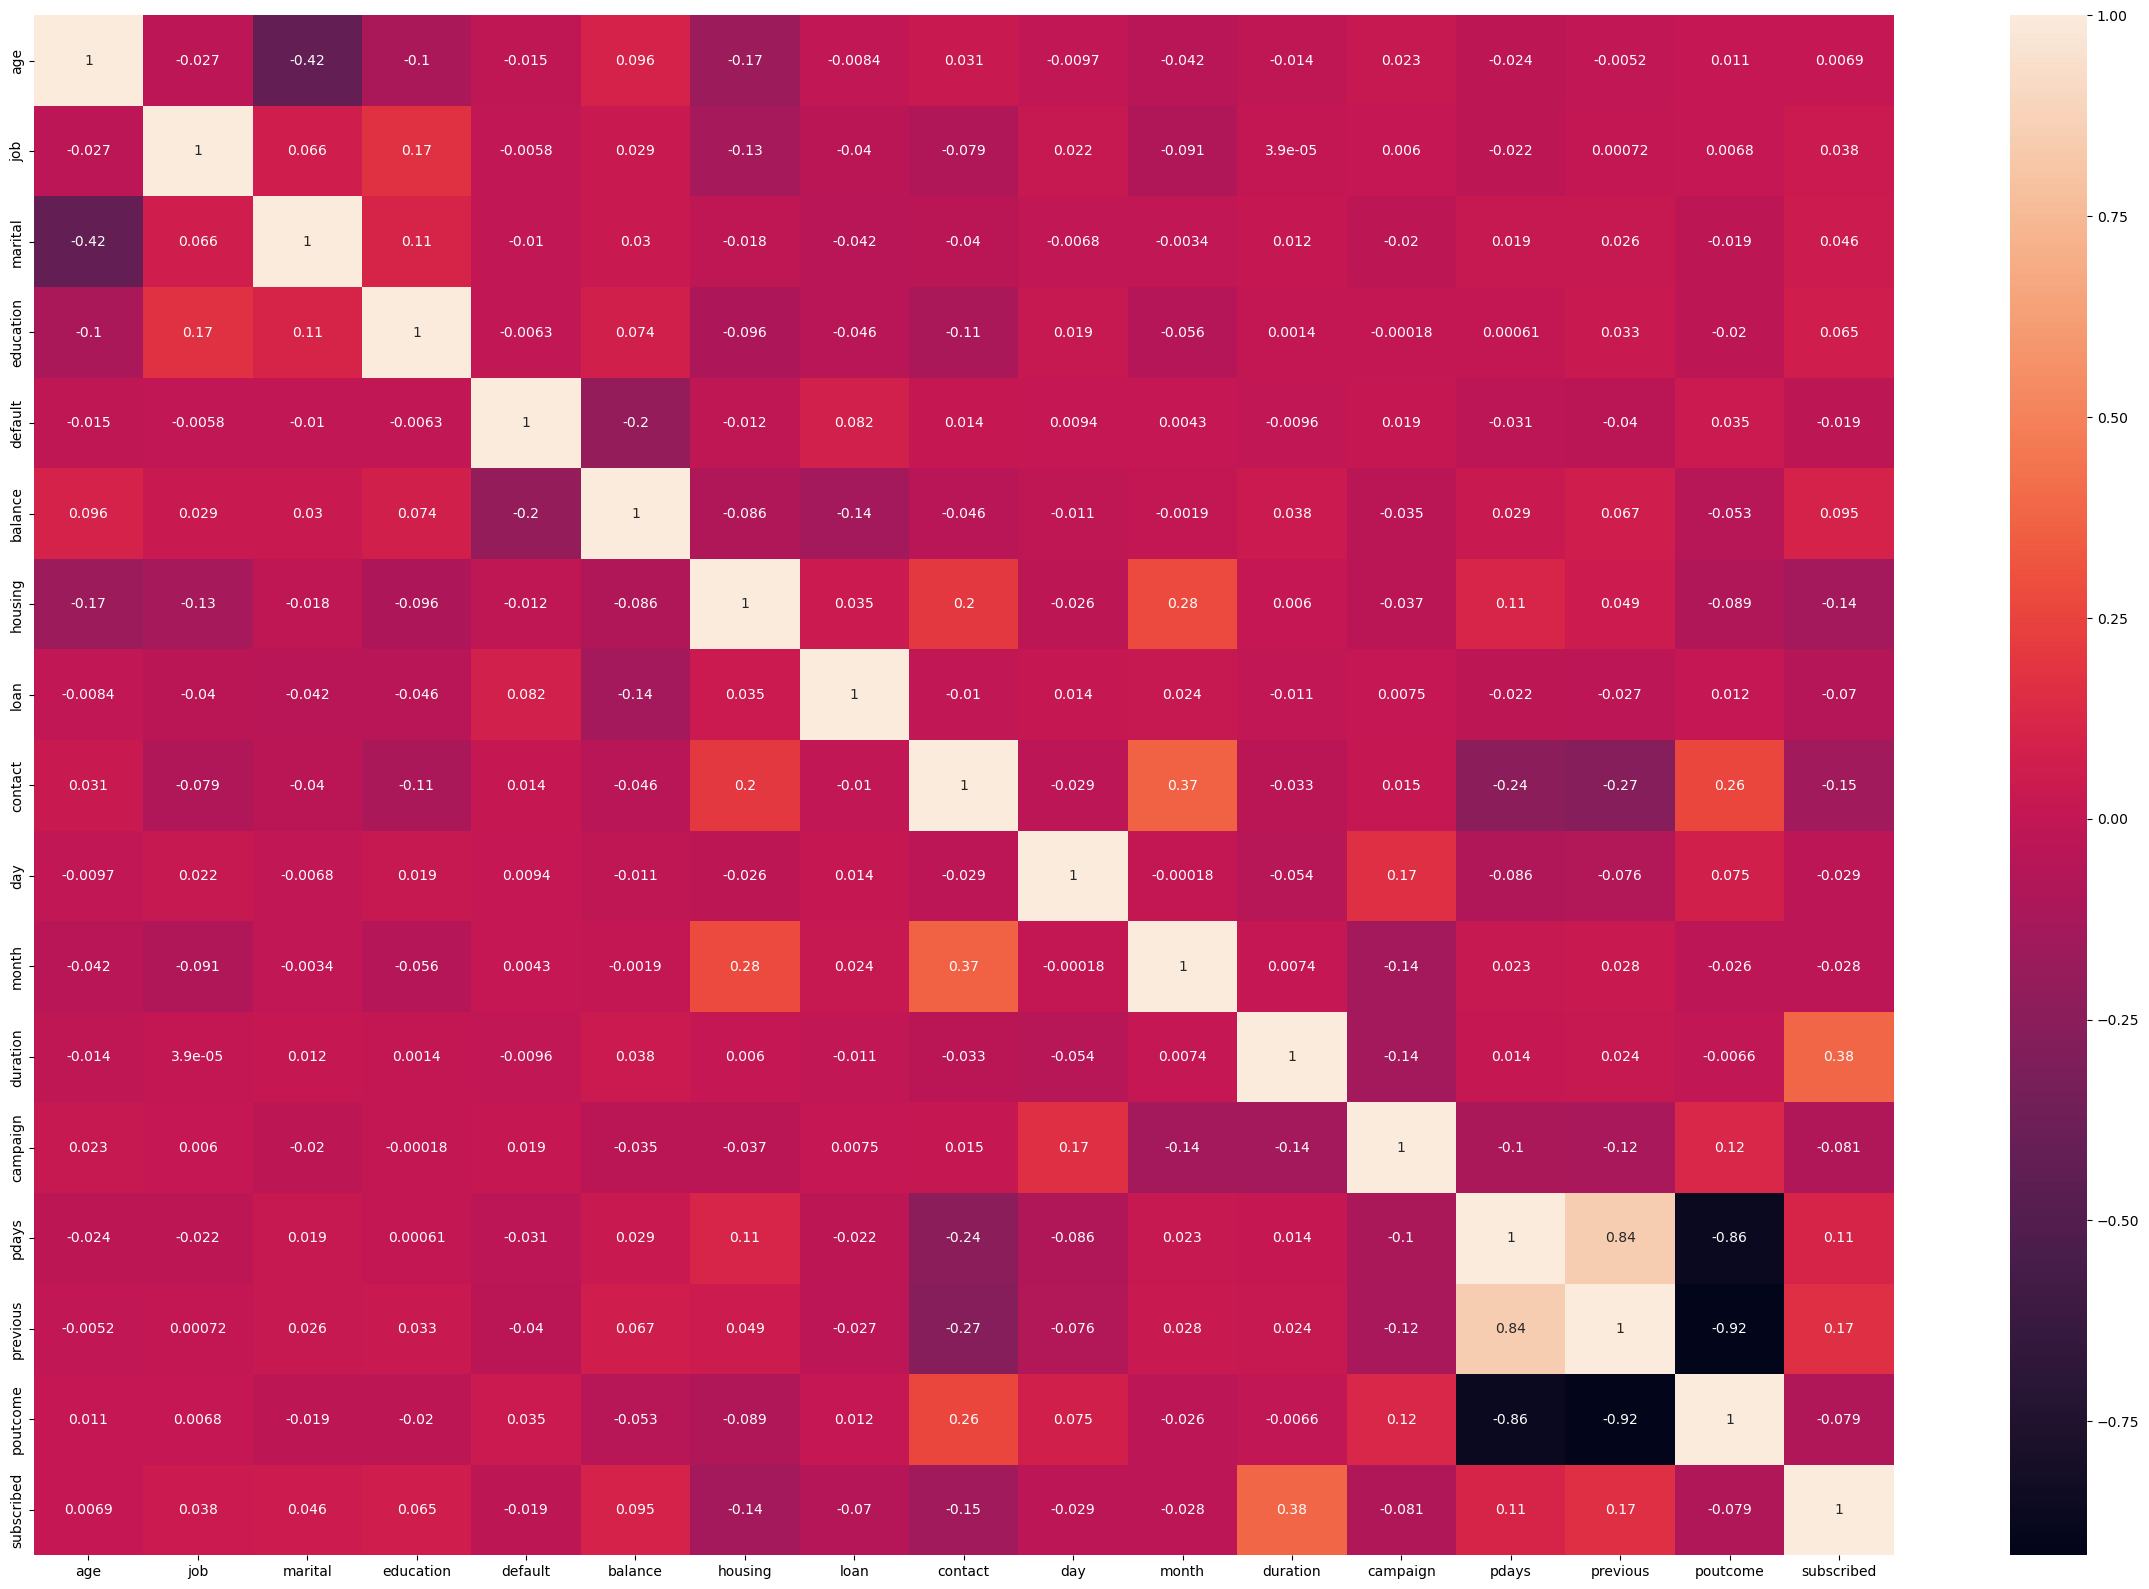

In [108]:
corr_hmap=df1.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [109]:
cor=df1.corr()
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.027465,-0.424245,-0.101424,-0.014836,0.096031,-0.169138,-0.008391,0.030934,-0.009693,-0.041975,-0.014391,0.023174,-0.023863,-0.005190,0.010772,0.006867
job,-0.027465,1.000000,0.066059,0.170521,-0.005770,0.029375,-0.125833,-0.039559,-0.079110,0.021561,-0.091259,0.000039,0.005960,-0.021881,0.000717,0.006810,0.037544
marital,-0.424245,0.066059,1.000000,0.107362,-0.010317,0.029836,-0.017590,-0.042059,-0.040161,-0.006772,-0.003355,0.012081,-0.019628,0.019277,0.025950,-0.019370,0.045615
education,-0.101424,0.170521,0.107362,1.000000,-0.006317,0.074358,-0.095868,-0.045763,-0.112397,0.019226,-0.056374,0.001411,-0.000177,0.000607,0.032600,-0.020178,0.065150
default,-0.014836,-0.005770,-0.010317,-0.006317,1.000000,-0.198169,-0.012167,0.082035,0.014038,0.009354,0.004283,-0.009644,0.018772,-0.030637,-0.039860,0.035476,-0.019073
balance,0.096031,0.029375,0.029836,0.074358,-0.198169,1.000000,-0.085740,-0.143360,-0.046323,-0.011134,-0.001860,0.037729,-0.035208,0.029377,0.067422,-0.053275,0.095232
housing,-0.169138,-0.125833,-0.017590,-0.095868,-0.012167,-0.085740,1.000000,0.035415,0.199359,-0.025503,0.275820,0.005993,-0.036819,0.112714,0.048975,-0.088675,-0.139017
loan,-0.008391,-0.039559,-0.042059,-0.045763,0.082035,-0.143360,0.035415,1.000000,-0.009953,0.014021,0.024160,-0.010669,0.007456,-0.021517,-0.026645,0.011645,-0.070446
contact,0.030934,-0.079110,-0.040161,-0.112397,0.014038,-0.046323,0.199359,-0.009953,1.000000,-0.029266,0.369658,-0.033381,0.015295,-0.238315,-0.272083,0.264305,-0.148418
day,-0.009693,0.021561,-0.006772,0.019226,0.009354,-0.011134,-0.025503,0.014021,-0.029266,1.000000,-0.000185,-0.053581,0.167850,-0.085574,-0.076067,0.075239,-0.028980


- Near to Zero : Very low: age,job,marital,education,default,balance,loan,day,month,campaign,poutcome
- Low Co relation: Housing, Contact, Pdays, Previous
- 0.3 or >-0.3 -- "duration" [Moderate]

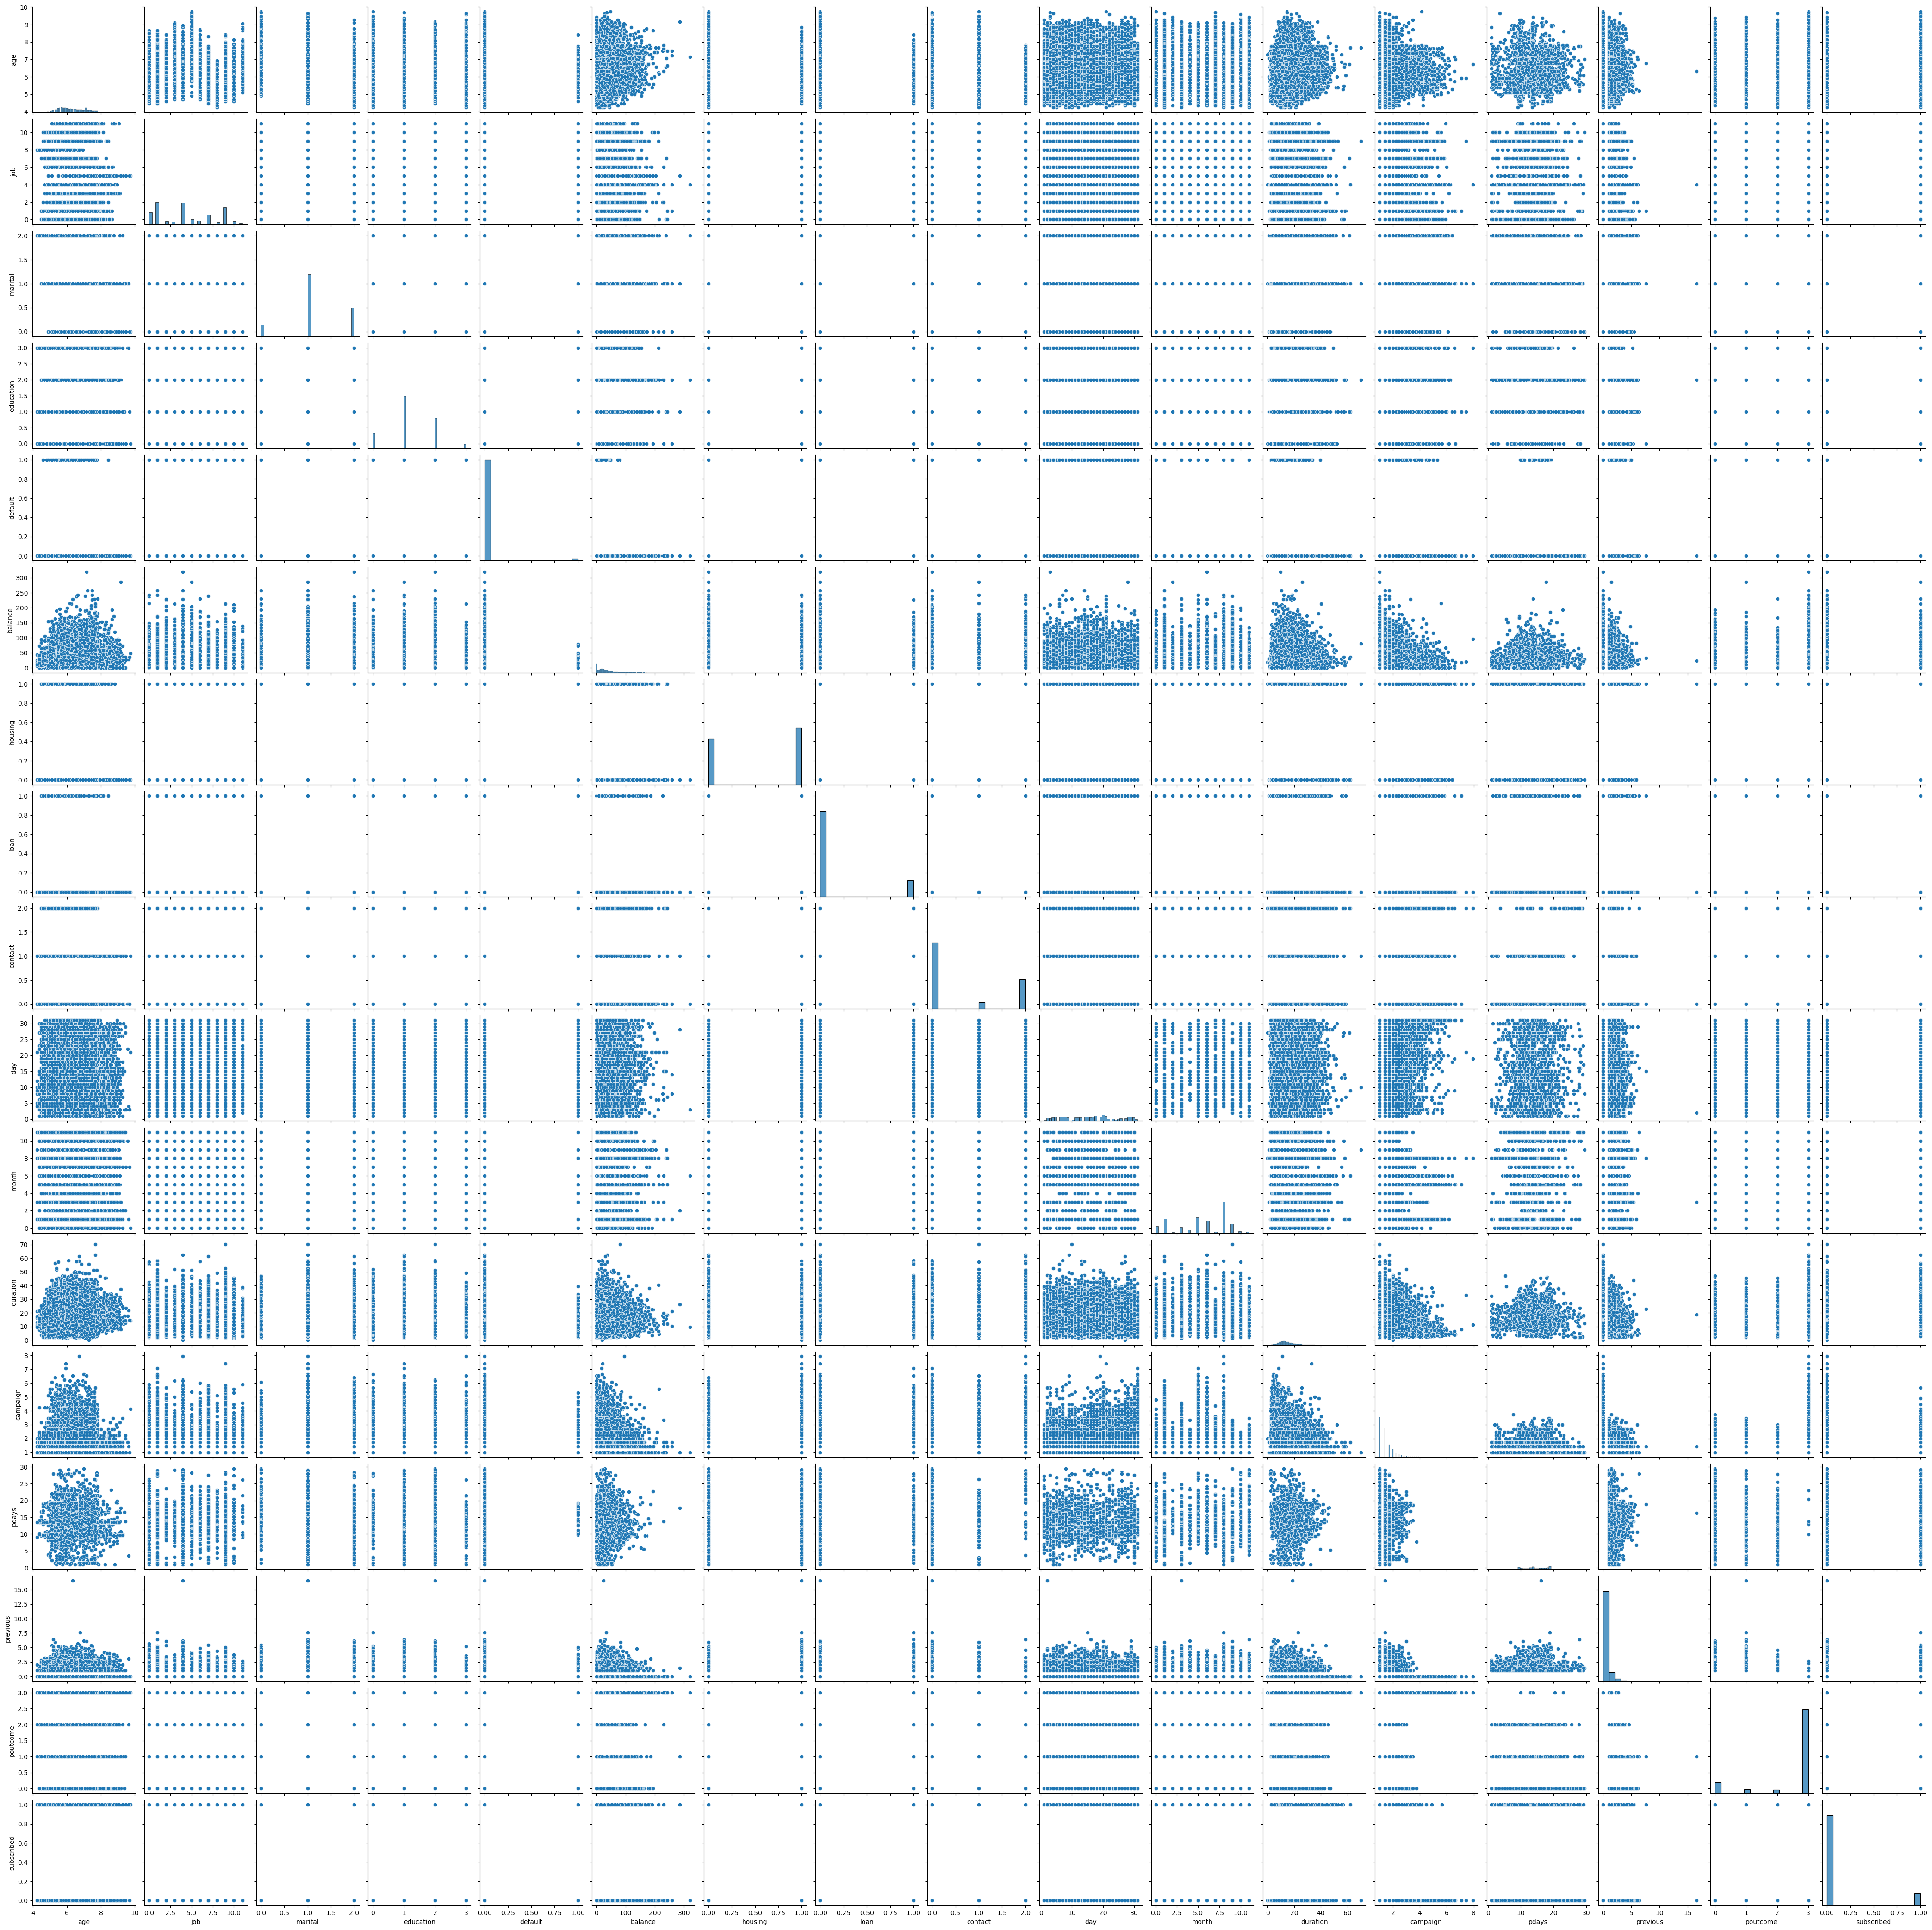

In [52]:
sns.pairplot(df)

In [114]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [115]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor   features
0    59.005244        age
1     2.874248        job
2     4.737034    marital
3     3.836734  education
4     1.065413    default
5     2.488749    balance
6     2.544240    housing
7     1.226392       loan
8     2.004534    contact
9     4.751241        day
10    5.448317      month
11   11.924015   duration
12   15.495218   campaign
13    4.479239      pdays
14    5.970334   previous
15   41.617117   poutcome


In [118]:
columns_to_drop=['age'] # Least co-relation with output
df1 = df.drop(columns_to_drop, axis=1)
df1

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,0.0,1.0,3.0,0.0,12.456918,0.0,0.0,1.0,19,9.0,3.530348,1.259921,-1,0.000000,3.0,0.0
1,11.0,1.0,1.0,0.0,1.442250,0.0,0.0,0.0,20,5.0,4.497941,1.259921,-1,0.000000,3.0,0.0
2,7.0,1.0,1.0,0.0,9.622603,1.0,0.0,0.0,18,5.0,6.214465,1.000000,-1,0.000000,3.0,0.0
3,4.0,0.0,2.0,0.0,14.868480,0.0,0.0,0.0,22,6.0,9.535417,1.000000,84,1.442250,2.0,1.0
4,9.0,1.0,1.0,0.0,4.918685,1.0,0.0,0.0,4,3.0,7.243156,1.000000,-1,0.000000,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,4.0,2.0,2.0,0.0,0.000000,1.0,0.0,0.0,12,8.0,4.876999,1.259921,-1,0.000000,3.0,0.0
31643,4.0,0.0,2.0,0.0,7.243156,0.0,1.0,0.0,5,6.0,7.594363,1.259921,-1,0.000000,3.0,1.0
31644,4.0,2.0,2.0,0.0,6.782423,0.0,0.0,0.0,7,1.0,3.332222,1.442250,-1,0.000000,3.0,0.0
31645,9.0,1.0,1.0,0.0,6.082202,1.0,0.0,1.0,15,8.0,2.802039,1.912931,337,2.289428,0.0,0.0


In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df1.iloc[:,0:-1]
x
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)
vif_cal()

    VIF Factor   features
0     2.847499        job
1     4.647871    marital
2     3.820971  education
3     1.064938    default
4     2.424058    balance
5     2.544021    housing
6     1.220858       loan
7     2.002741    contact
8     4.694031        day
9     5.328977      month
10   10.868955   duration
11   13.752069   campaign
12    4.068568      pdays
13    4.940703   previous
14   23.857762   poutcome


## MODEL
## 1. Feature Scaling using Standard Scalarization

In [120]:
y=df1["subscribed"]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-1.324317,-0.275405,2.369229,-0.137234,0.757778,-1.118201,-0.439893,0.395076,0.379579,1.154007,-1.328474,-0.127816,-0.408555,-0.449105,0.441777
1,2.037729,-0.275405,-0.300345,-0.137234,-0.911548,-1.118201,-0.439893,-0.716695,0.499526,-0.177462,-0.775734,-0.127816,-0.408555,-0.449105,0.441777
2,0.815167,-0.275405,-0.300345,-0.137234,0.328224,0.894294,-0.439893,-0.716695,0.259631,-0.177462,0.204835,-0.873593,-0.408555,-0.449105,0.441777
3,-0.101755,-1.922374,1.034442,-0.137234,1.123262,-1.118201,-0.439893,-0.716695,0.739422,0.155405,2.101938,-0.873593,0.447299,2.189741,-0.576498
4,1.426448,-0.275405,-0.300345,-0.137234,-0.384677,0.894294,-0.439893,-0.716695,-1.419637,-0.843197,0.792477,-0.873593,-0.408555,-0.449105,0.441777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-0.101755,1.371563,1.034442,-0.137234,-1.130128,0.894294,-0.439893,-0.716695,-0.460055,0.821140,-0.559197,-0.127816,-0.408555,-0.449105,0.441777
31643,-0.101755,-1.922374,1.034442,-0.137234,-0.032392,-1.118201,2.273280,-0.716695,-1.299690,0.155405,0.993105,-0.127816,-0.408555,-0.449105,0.441777
31644,-0.101755,1.371563,1.034442,-0.137234,-0.102219,-1.118201,-0.439893,-0.716695,-1.059794,-1.508931,-1.441655,0.395329,-0.408555,-0.449105,0.441777
31645,1.426448,-0.275405,-0.300345,-0.137234,-0.208341,0.894294,-0.439893,0.395076,-0.100212,0.821140,-1.744523,1.745828,2.994723,3.739801,-2.613048


## 2. OverSampling

In [121]:
y.value_counts()

subscribed
0.0    27932
1.0     3715
Name: count, dtype: int64

In [122]:
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1,y1=SM.fit_resample(x,y)

In [123]:
y1.value_counts()

subscribed
0.0    27932
1.0    27932
Name: count, dtype: int64

## 3. Best random state value:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



maxAccu=0
maxRS=0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RFR = RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS=i

## 4. Creating train test split¶

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed


## 5. Classification Algorithms and Cross Validation Score

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier()
lg=LogisticRegression()
svc=SVC(kernel = "linear")
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
gnb=GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dtc = DecisionTreeClassifier(criterion = "gini")



model=[rfc,etc,lg,svc,gbc,abc,bc,gnb,knn,dtc]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of:  ",m," is " )
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print("\n")
    score = cross_val_score(m,x1,y1)
    print("Cross Validation of:  ",m," is " )
    print(score)
    print(score.mean())
    print("Diff in Acc Score and Cross Val Score is - ",accuracy_score(y_test,predm)-score.mean())
    print("\n")

## Best Model is : ExtraTreesClassifier(),RandomForestClassifier()¶

## 6. Hyper Parameter Tuning¶